In [1]:
import RNA
print(RNA.__file__)

/opt/conda/envs/pytorch/lib/python3.9/site-packages/RNA/__init__.py


In [1]:
from utility.RNAParser import RNAData
from utility.RNAQUBO import RNAQUBO
from utility.AnnealerOptimizer import Annealer
from utility.ResultProcess import ResultParser
import time

timestamp = time.strftime("%Y%m%d-%H")

2023-02-05 04:31:13,737 dwave.cloud INFO MainThread Log level for 'dwave.cloud' namespace set to 0


# Step 1: Prepare Data

In this part, we load the folder with the raw rna data for experimentation. To evaluate the quantum solution and the actual solution include both fasta and ct files. To only generate a quantum solution, upload a fasta file.


In [2]:
from braket.aws import AwsQuantumJob, AwsSession

# initial parameters for experiment data
s3_bucket = AwsSession().default_bucket() # change to the name of bucket created in your deployment
prefix = "rna-folding" # the name of the folder in the bucket

# enter folder path, for instance './rna-data'
raw_path = './rna-folding-data'


In [3]:
rna_data = RNAData(raw_path)

data_path = rna_data.save("latest")

# print(f"You have loaded the raw rna data and saved as {data_path}. \n\
# This rna is {num_rna_length} bases long")
# #TODO inform them if it will compare or just calculate
# print()

INFO:root:finish save rna-folding_data_latest.pickle


After running this block, the processed data 
will be saved as **rna-folding_bpRNA_CRW_32863_data_latest.pickle**
and **data_path** will be updated. We can see that this 
molecule has 23 bases.

# Step 2: Build Model

In this part, we build the Quadratic Unconstrained 
Binary Optimization (QUBO) model for rna folding.

First, we set the following parameters and 
initialize the RNAQUBO object. 

<center>

| Parameter | Description | Value |
|--- |--- |--- |
| PKP | pseudoknot penalty | -1.0, -0.5, 0.0, 0.5, 1.0 |
| S | penalty for short stems | 1 |
| O | penalty for overlaps | 1e6 |
| method | the method of building model | 'qc' |
| data_path | pickle file directory of rna data |  |

 </center>

In [4]:
# initial the RNAQUBO object
init_param = {}
method = ['qc']

for mt in method:
    if mt == 'qc':
        init_param[mt] = {}
        init_param[mt]['params'] = ["PKP", "S", "O"]
    
rna_qubo = RNAQUBO( data_path, method, **init_param)

INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO


In [5]:
# set the parameters for model
model_param = {}

method = 'qc'
model_param[method] = {}

# parameters
model_param[method]['PKP'] = [-1.0, -0.5, 0.0, 0.5, 1.0]
model_param[method]['S'] = [1]
model_param[method]['O'] = [1e6]

rna_qubo.build_models(**model_param)

0

In [6]:
# describe the model parameters
model_info = rna_qubo.describe_models()

INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15984_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_PDB_368_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_32863_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_RFAM_9907_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15563_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, 

In [7]:
# save the model
model_path = rna_qubo.save("latest")

print(f"You have built the QUBO models and saved them as rna_folding_latest.pickle")

INFO:root:finish save rna_folding_latest.pickle


You have built the QUBO models and saved them as rna_folding_latest.pickle


In [8]:
# !mv rna_folding_latest.pickle rna-data/

# Step 3: Optimize Configuration

In this part, we use SA and QA to find the optimized configuration of rna folding.
At first, we load the model file using **RNAQUBO** object

In [9]:
rna_qubo_optimize = RNAQUBO.load(model_path)

In [10]:
model_info = rna_qubo_optimize.describe_models()

INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15984_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_PDB_368_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_32863_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_RFAM_9907_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15563_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, 

In [11]:
# get the model you want to optimize
rna_name = 'bpRNA_CRW_32863'
PKP = 0.5
O = 1e6
S = 1
method = 'qc'

model_name = "{}+{}+{}+{}+".format(rna_name, PKP, O, S)

qubo_model = rna_qubo_optimize.get_model(rna_name, method, model_name)

After we get the qubo model, we need to set the parameters for optimization: 
| Parameter | Description | Value |
|--- |--- |--- |
|method | annealing method for QUBO problem |'dwave-sa': use the simulated annealer in ocean toolkit<br> 'dwave-qa': use the quantum annealer|
|shots| number of reads, refer to [dwave-sa](https://docs.ocean.dwavesys.com/projects/neal/en/latest/reference/generated/neal.sampler.SimulatedAnnealingSampler.sample.html#neal.sampler.SimulatedAnnealingSampler.sample) and [dwave-qa](https://amazon-braket-ocean-plugin-python.readthedocs.io/en/latest/_apidoc/braket.ocean_plugin.braket_sampler.html) for details |1 to 10,000|
|bucket | the s3 bucket to store your results | - |
|prefix | the name of the folder in your s3 bucket | - |
|device | the arn name to run your quantum annealing| 'arn:aws:braket:::device/qpu/d-wave/Advantage_system4' <br> 'arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6'|

Then, we can run the SA for this problem:

In [12]:
method = 'neal-sa'

optimizer_param = {}
optimizer_param['shots'] = 1000

sa_optimizer = Annealer(qubo_model, method, **optimizer_param)

INFO:root:use neal simulated annealer (c++) from dimod


In [13]:
sa_optimize_result = sa_optimizer.fit()

INFO:root:fit() ...
INFO:root:neal-sa save to local
INFO:root:finish save neal-sa_result.pickle


In [14]:
# dwave device has been moved to marketplace, please refer to the following link
# https://aws.amazon.com/blogs/quantum-computing/using-d-wave-leap-from-the-aws-marketplace-with-amazon-braket-notebooks-and-braket-sdk/
# method = 'dwave-qa'

# optimizer_param = {}
# optimizer_param['shots'] = 1000
# optimizer_param['bucket'] = s3_bucket # the name of the bucket
# optimizer_param['prefix'] = prefix # the name of the folder in the bucket
# optimizer_param['device'] = "arn:aws:braket:::device/qpu/d-wave/Advantage_system4"
# optimizer_param["embed_method"] = "default"

# qa_optimizer = Annealer(qubo_model, method, **optimizer_param)

# # not create annealing task, only embedding logic
# qa_optimizer.embed()
# # create annealing task
# qa_optimize_result = qa_optimizer.fit()

# qa_task_id = qa_optimizer.get_task_id()
# print(f"task id is {qa_task_id}")

In [15]:
print(f"dwave-sa run time {sa_optimize_result['time']}")
# print(f"dwave-qa run time {qa_optimize_result['time']}")

dwave-sa run time 0.3331606388092041


# Step 4: Post Process

In this part, we post process the optimizing results for evaluation and visualization.
At first, we prepare the following parameters:

| Parameter | Description | Value |
|--- |--- |--- |
|method | annealing method for QUBO problem |'dwave-sa': use the simulated annealer in ocean toolkit<br> 'dwave-qa': use the quantum annealer|
|raw_path| the path for the original molecule file| './molecule-data/117_ideal.mol2' in this example |
|data_path| the path for the processed molecule file| './qmu_117_ideal_data_latest.mol2' in this example |
|bucket | the s3 bucket to store your results | - |
|prefix | the name of the folder in your s3 bucket | - |
|task_id | the id for your quantum annealing task| '2b5a3b05-1a0e-443a-852c-4ec422a10e59' in this example |

In [16]:
method = "neal-sa"
sa_param = {}
sa_param["raw_path"] = raw_path
sa_param["data_path"] = data_path

sa_process_result = ResultParser(method, **sa_param)
# print(f"{method} result is {sa_process_result.get_all_result()}")

local_time, _ , _, _= sa_process_result.get_time()

print(f"time for {method}: \n \
    local time is {local_time}")

INFO:root:_load_raw_result
INFO:root:load simulated annealer neal-sa raw result
INFO:root:_parse_model_info
INFO:root:Data.load()
INFO:root:actual energy is -36
INFO:root:parse simulated annealer result
INFO:root:_init_parameters
INFO:root:sa only has local_time!


time for neal-sa: 
     local time is 0.3331606388092041


In [17]:
sa_atom_pos_data = sa_process_result.generate_optimize_pts()
sa_result_json = sa_process_result.save_file(f"{timestamp}")

print(f"result optimization file path is {sa_result_json}")

INFO:root:generate_optimize_pts()
INFO:root:save_file 20230205-04
INFO:root:finish save bpRNA_CRW_32863_neal-sa_20230205-04.json


result optimization file path is bpRNA_CRW_32863_neal-sa_20230205-04.json


In [18]:
sa_process_result.parameters

{'rna-strand': 'GCGGGUAUAGUUUAGUGGUAAAA',
 'rna-name': 'bpRNA_CRW_32863',
 'structure': {'actual': {'stems': [[11, 23, 6]], 'energy': -36},
  'predict': {'stems': [[11, 22, 8, 4]],
   'energy': -64.0,
   'bp-specificity': 0.0,
   'bp-sensitivity': 0.0,
   'bases-specificity': 0.9333333333333333,
   'bases-sensitivity': 0.875}}}

INFO:forgi.graph._cofold:Testing connectivity: connected component =?= all nodes:
['f0', 'h0', 's0'] =?= ['f0', 'h0', 's0']
INFO:forgi.graph.bulge_graph:Stems with length 1: []
INFO:forgi.visual.mplotlib:Starting to plot RNA...


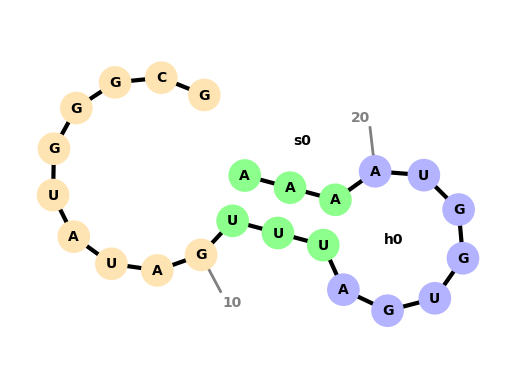

In [19]:
sa_process_result.RNAFoldingView('raw',raw_path)

INFO:forgi.graph._cofold:Testing connectivity: connected component =?= all nodes:
['f0', 'h0', 's0', 't0'] =?= ['f0', 'h0', 's0', 't0']
INFO:forgi.graph.bulge_graph:Stems with length 1: []
INFO:forgi.visual.mplotlib:Starting to plot RNA...
INFO:forgi.visual.mplotlib:Cannot annotate h0 as 'h0' ON THE INSIDE, because of insufficient space. Trying outside...


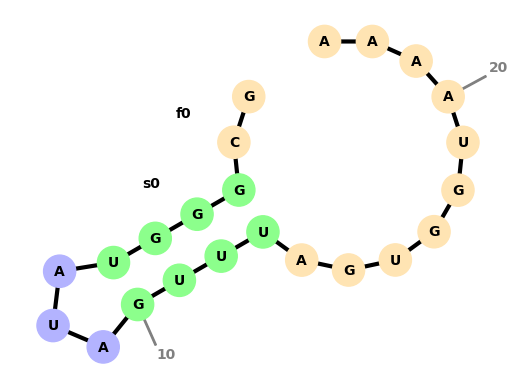

In [20]:
sa_process_result.RNAFoldingView('predict',raw_path)

In [21]:
# The following codes can be used as the reference once you can access d-wave devices from marketplace
# method = "dwave-qa"
# qa_param = {}
# qa_param["bucket"] = s3_bucket
# qa_param["prefix"] = prefix
# qa_param["task_id"] = qa_task_id
# qa_param["raw_path"] = raw_path
# qa_param["data_path"] = data_path

# qa_process_result = ResultParser(method, **qa_param)
# # print(f"{method} result is {qa_process_result.get_all_result()}")

# local_time, task_time, total_time, access_time = qa_process_result.get_time()

# print(f"time for {method}: \n \
#     local time is {local_time},\n \
#     task time is {task_time}, \n \
#     qpu total time is {total_time}, \n \
#     qpu access time is {access_time}")

In [22]:
# qa_atom_pos_data = qa_process_result.generate_optimize_pts()
# qa_result_json = qa_process_result.save_file(f"{timestamp}")
# print(f"result optimization file path is {qa_result_json}")